<!-- # Copyright (c) 2025 takotime808 -->
## Uncertainty Metrics for Multioutput Regressors (Flexible API) ##

This notebook demonstrates a robust, type-annotated function to extract uncertainty metrics from any multi-output regressor, using [uncertainty-toolbox](https://uncertainty-toolbox.readthedocs.io/en/latest/). It supports various uncertainty APIs, including scikit-learn, GPs, and custom models.

----
### Imports & Settings ###


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split

from multioutreg.performance.metrics_generalized_api import get_uq_performance_metrics_flexible

# savefig = "./metrics.png"
savefig = False


Bad key text.markup in file /Users/tako/.matplotlib/matplotlibrc, line 165 ("text.markup         : 'plain'  # Affects how text, such as titles and labels, are")
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.3/matplotlibrc.template
or from the matplotlib source distribution


<!-- # Copyright (c) 2025 takotime808 -->

### Make Example Dataset ###

In [2]:
rng = np.random.RandomState(42)
X = rng.rand(300, 5)
Y = np.dot(X, rng.rand(5, 3)) + rng.randn(300, 3) * 0.1

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


<!-- # Copyright (c) 2025 takotime808 -->

### Build Model ###

In [3]:
base_gp = GaussianProcessRegressor(random_state=0)
multi_gp = MultiOutputRegressor(base_gp)
multi_gp.fit(X_train, Y_train)

MultiOutputRegressor(estimator=GaussianProcessRegressor(random_state=0))

<!-- # Copyright (c) 2025 takotime808 -->

### Get Metrics ###

In [4]:
metrics_df, overall_metrics = get_uq_performance_metrics_flexible(multi_gp, X_test, Y_test)

print("Available columns:", metrics_df.columns)

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics
 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:00<00:00, 30.31it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:00<00:00, 32.89it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.309
  RMSE          0.450
  MDAE          0.214
  MARPD         22.422
  R2            -0.029
  Correlation   0.673
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.550
  Mean-absolute Calibration Error       0.472
  Miscalibration Area                   0.477
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.490
     Group Size: 0.56 -- Calibration Error: 0.487
     Group Size: 1.00 -- Calibration Error: 0.472
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.570
     Group Size: 0.56 -- Calibration Error: 0.570
     Group Size: 1.00 -- Calibration Error: 0.550
==============

100%|██████████| 10/10 [00:00<00:00, 33.12it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:00<00:00, 32.79it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.545
  RMSE          0.846
  MDAE          0.333
  MARPD         46.628
  R2            -6.329
  Correlation   0.408
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.570
  Mean-absolute Calibration Error       0.490
  Miscalibration Area                   0.495
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.490
     Group Size: 0.56 -- Calibration Error: 0.490
     Group Size: 1.00 -- Calibration Error: 0.490
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.570
     Group Size: 0.56 -- Calibration Error: 0.570
     Group Size: 1.00 -- Calibration Error: 0.570
==============

100%|██████████| 10/10 [00:00<00:00, 33.04it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:00<00:00, 32.90it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.242
  RMSE          0.311
  MDAE          0.173
  MARPD         27.328
  R2            0.033
  Correlation   0.602
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.557
  Mean-absolute Calibration Error       0.478
  Miscalibration Area                   0.483
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.490
     Group Size: 0.56 -- Calibration Error: 0.490
     Group Size: 1.00 -- Calibration Error: 0.478
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.570
     Group Size: 0.56 -- Calibration Error: 0.570
     Group Size: 1.00 -- Calibration Error: 0.557
===============

100%|██████████| 10/10 [00:00<00:00, 30.97it/s]


  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████| 10/10 [00:00<00:00, 30.84it/s]


 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           0.365
  RMSE          0.582
  MDAE          0.236
  MARPD         32.126
  R2            -0.702
  Correlation   0.591
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.559
  Mean-absolute Calibration Error       0.480
  Miscalibration Area                   0.485
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.490
     Group Size: 0.56 -- Calibration Error: 0.487
     Group Size: 1.00 -- Calibration Error: 0.480
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.570
     Group Size: 0.56 -- Calibration Error: 0.566
     Group Size: 1.00 -- Calibration Error: 0.559
==============

<!-- # Copyright (c) 2025 takotime808 -->

### Generate Plots ###

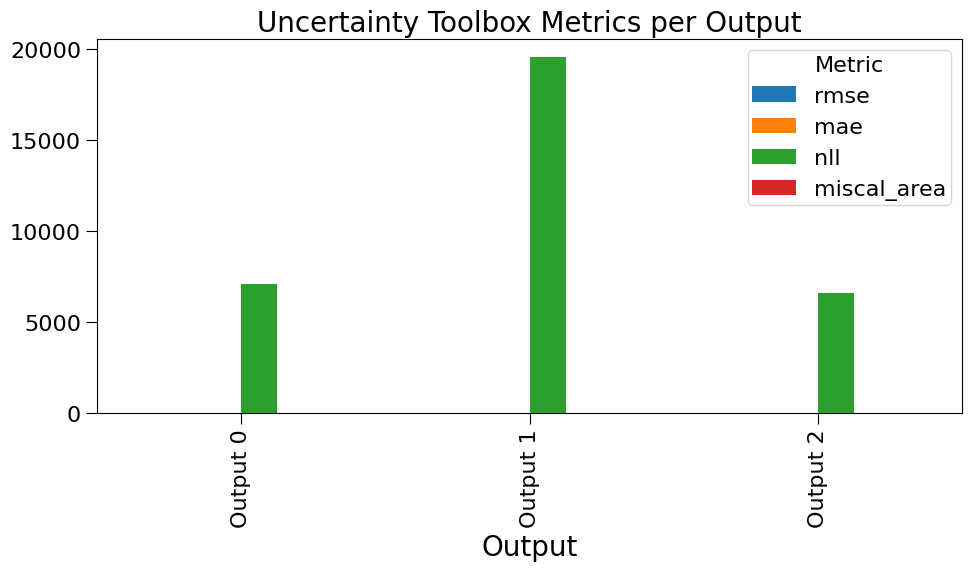

In [5]:
metrics_to_plot = [m for m in ['rmse', 'mae', 'nll', 'miscal_area'] if m in metrics_df.columns]

if not metrics_to_plot:
    print("No matching metrics found in metrics_df. Available columns:", metrics_df.columns)
else:
    ax = metrics_df[metrics_to_plot].plot.bar(figsize=(10, 6))
    ax.set_xticklabels([f"Output {i}" for i in metrics_df['output']])
    plt.xlabel('Output')
    plt.title('Uncertainty Toolbox Metrics per Output')
    plt.legend(title="Metric")
    plt.tight_layout()
    if savefig:
        plt.savefig(savefig)
    else:
        plt.show()

<!-- # Copyright (c) 2025 takotime808 -->

**The scale for `nll` overshadows the other metrics. Plot metrics without `nll`.**

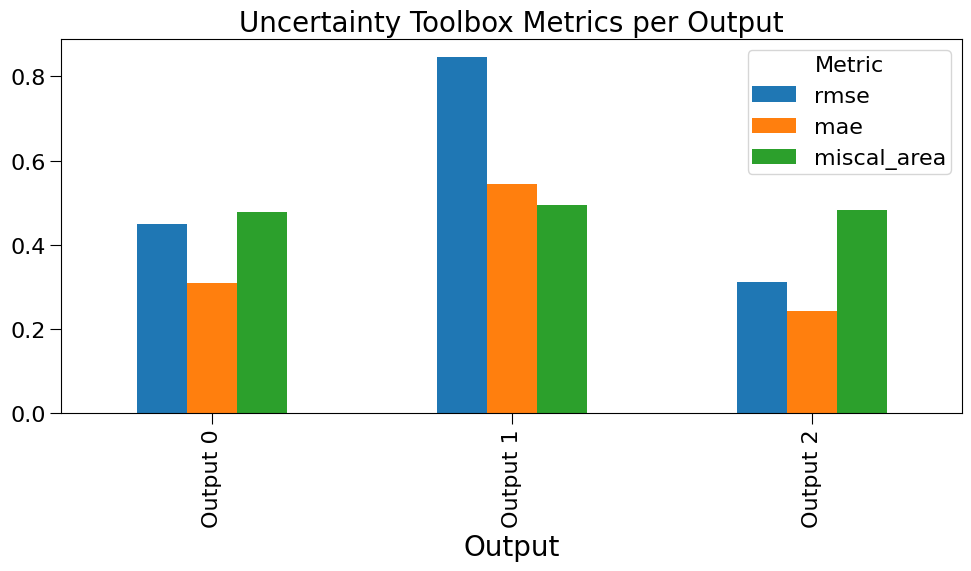

In [6]:
metrics_to_plot = [m for m in ['rmse', 'mae', 'miscal_area'] if m in metrics_df.columns]

if not metrics_to_plot:
    print("No matching metrics found in metrics_df. Available columns:", metrics_df.columns)
else:
    ax = metrics_df[metrics_to_plot].plot.bar(figsize=(10, 6))
    # ax.set_xticklabels([f"Output {i}" for i in metrics_df['output']])
    ax.set_xticklabels([f"Output {i}" for i in metrics_df['output']])
    plt.xlabel('Output')
    plt.title('Uncertainty Toolbox Metrics per Output')
    plt.legend(title="Metric")
    plt.tight_layout()
    if savefig:
        plt.savefig(savefig)
    else:
        plt.show()

<!-- # Copyright (c) 2025 takotime808 -->

**More plotting methods.**

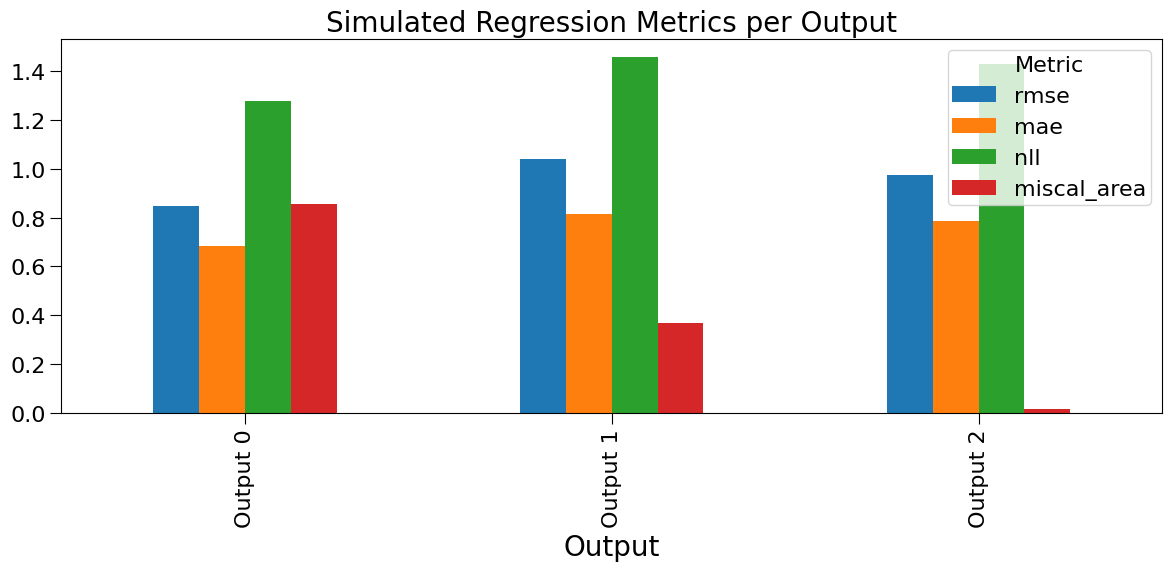

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use mock for uncertainty_toolbox metrics
def mock_get_all_metrics(y_true, y_pred, y_std):
    # Return a dict mimicking regression metrics from uncertainty_toolbox
    return {
        'rmse': np.sqrt(np.mean((y_true - y_pred)**2)),
        'mae': np.mean(np.abs(y_true - y_pred)),
        'nll': np.mean(0.5 * np.log(2 * np.pi * y_std**2) + 0.5 * ((y_true - y_pred) / y_std) ** 2),
        'miscal_area': np.random.uniform(0, 1),  # placeholder
        'output': -1  # to be overwritten
    }

n_samples = 100
n_outputs = 3
y_true = np.random.uniform(0, 10, size=(n_samples, n_outputs))
y_pred = y_true + np.random.normal(0, 1, size=(n_samples, n_outputs))
# Ensure strictly positive stddevs
y_std  = np.abs(np.random.normal(1, 0.2, size=(n_samples, n_outputs))) + 1e-3

metrics_list = []
for i in range(y_true.shape[1]):
    metrics = mock_get_all_metrics(
        y_true[:, i],
        y_pred[:, i],
        y_std[:, i]
    )
    metrics['output'] = i
    metrics_list.append(metrics)

df_metrics = pd.DataFrame(metrics_list)

metrics_to_plot = [c for c in df_metrics.columns if c != 'output']
ax = df_metrics[metrics_to_plot].plot.bar(figsize=(12, 6))
ax.set_xticklabels([f"Output {i}" for i in df_metrics['output']])
plt.xlabel('Output')
plt.title('Simulated Regression Metrics per Output')
plt.legend(title="Metric")
plt.tight_layout()
plt.show()
